In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
from matplotlib import pyplot as plt

def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()

Each image is an numpy array of shape 28,28. Since it is grayscale, it has only one channel

In [6]:
print(type(x_train[0]), x_train[0].shape)

<class 'numpy.ndarray'> (28, 28)


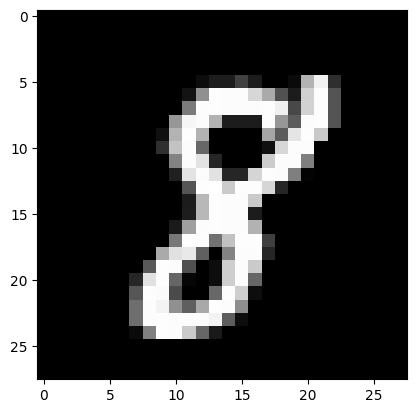

In [16]:
show_img(x_train[97])

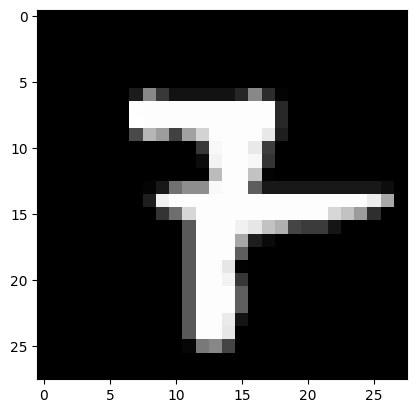

In [15]:
show_img(x_test[97])

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [19]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [20]:
y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train = x_train.reshape(60000, 784)/255.0
X_test = x_test.reshape(10000, 784)/255.0

In [24]:
X_train[7][150:200]

array([0.        , 0.14901961, 0.16862745, 0.41176471, 1.        ,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.68235294, 0.02352941, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16862745, 0.54509804, 0.87843137,
       0.88627451, 0.98823529, 0.99215686, 0.98823529, 0.98823529,
       0.98823529, 0.98823529, 0.98823529, 0.98823529, 0.61960784,
       0.05490196, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [25]:
X_val = X_test[5000:]
X_test = X_test[:5000]

y_val = y_test[5000:]
y_test = y_test[:5000]

In [26]:
X_val.shape, y_val.shape

((5000, 784), (5000, 10))

In [27]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping], verbose=1)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2424 - accuracy: 0.9282 - val_loss: 0.0926 - val_accuracy: 0.9726
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.0618 - val_accuracy: 0.9818
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0504 - val_accuracy: 0.9858
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0585 - val_accuracy: 0.9834
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9881 - val_loss: 0.0548 - val_accuracy: 0.9860
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.0549 - val_accuracy:

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

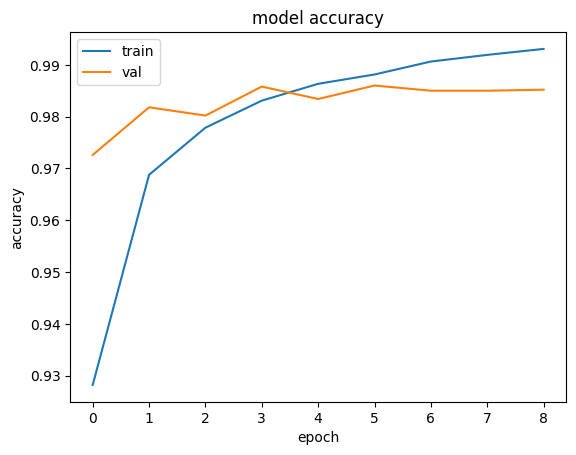

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

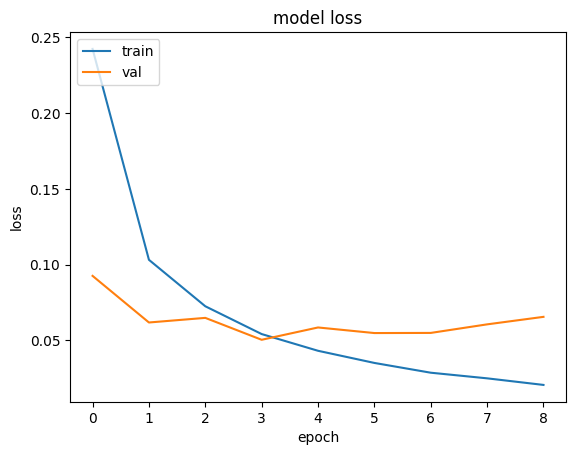

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.1006 - accuracy: 0.9704


[0.10060448944568634, 0.9703999757766724]

In [36]:
y_pred_test = model.predict(X_test[:10])

1/1 [==============================] - 0s 70ms/step


In [39]:
y_pred_test = y_pred_test.argmax(axis=1)

In [40]:
y_pred_test

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

Actual: 7 Predicted: 7



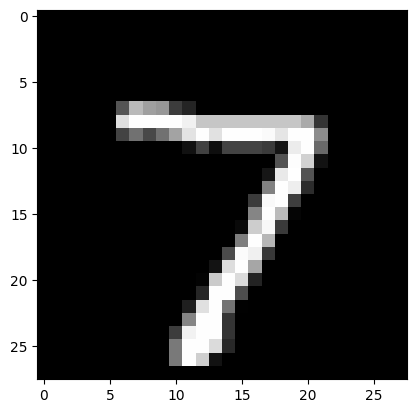

-------------------------------------------------------
Actual: 2 Predicted: 2



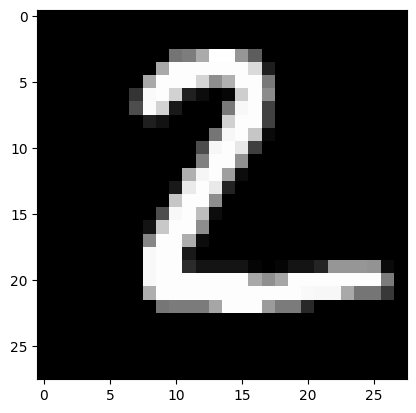

-------------------------------------------------------
Actual: 1 Predicted: 1



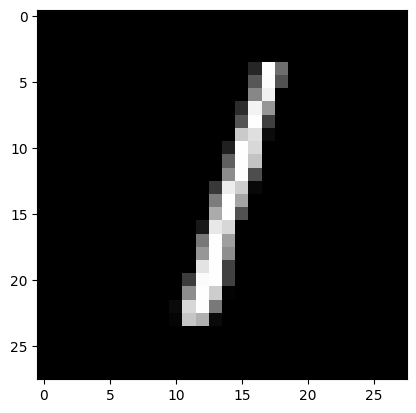

-------------------------------------------------------
Actual: 0 Predicted: 0



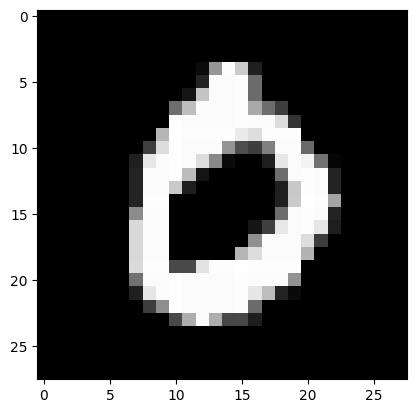

-------------------------------------------------------
Actual: 4 Predicted: 4



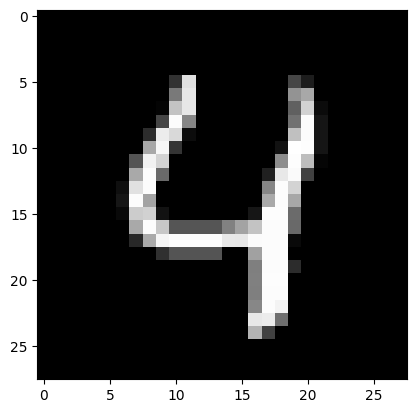

-------------------------------------------------------
Actual: 1 Predicted: 1



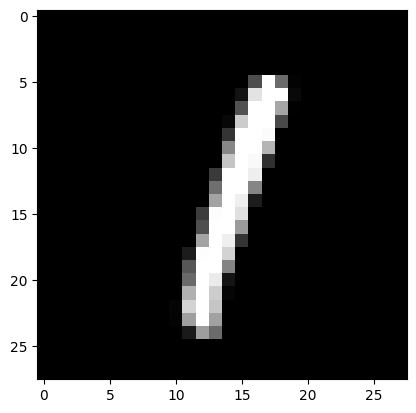

-------------------------------------------------------
Actual: 4 Predicted: 4



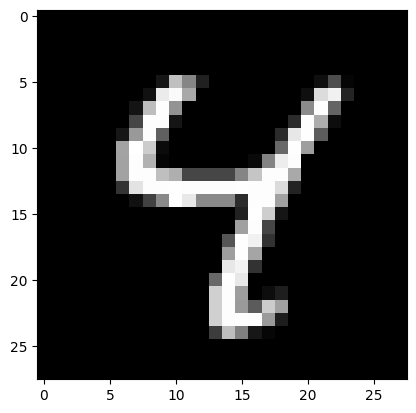

-------------------------------------------------------
Actual: 9 Predicted: 9



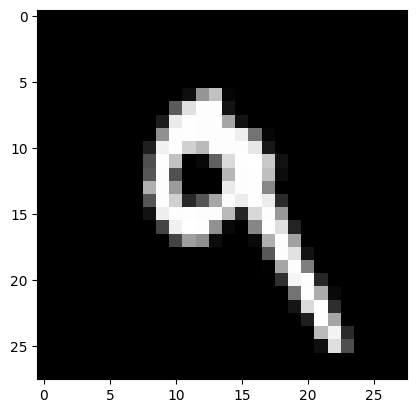

-------------------------------------------------------
Actual: 5 Predicted: 6



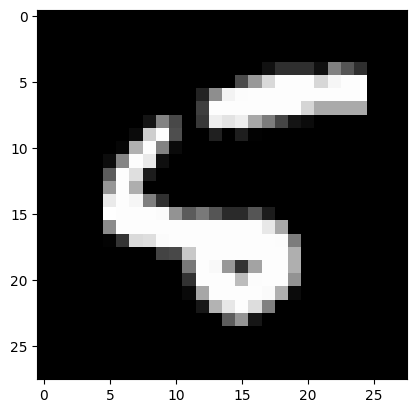

-------------------------------------------------------
Actual: 9 Predicted: 9



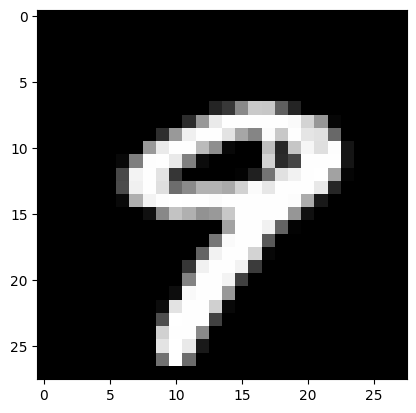

-------------------------------------------------------


In [46]:
T_test = y_test.argmax(axis=1)
for i in range(10):
  print(f"Actual: {T_test[i]} Predicted: {y_pred_test[i]}")
  print()
  show_img(x_test[i])
  print("-------------------------------------------------------")